# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

# **Tópicos**

<ol type="1">
  <li>Entendimento do negócio;</li>
  <li>Entendimento do dados;</li>
  <li>Dicionário de dados;</li>
  <li>Análise de dados.</li>
  <li>Streamlit com as análises.</li>
</ol>

## 1\. Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o read_csv do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo previsao_de_renda.csv

## Etapa 2 Crisp-DM: Entendimento dos dados

### Dicionário de dados



| Variável                | Descrição               | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data em que foi adicionado registro                                      | object|
| index                   |  Seguêncial em que foi adicionado no sistema                                      | int64|
| sexo                    |  ----            | object|
| posse_de_veiculo   | Se o cliente tem veiculo ou não | bool|
| posse_de_imovel    |  Se o cliente tem possue imvel ou não | bool|
| qtd_filhos            |  Quantidade de filhos por familia  | int64|
| tipo_renda            |  Ocupação dos clientes(Fonte da renda)   | object|
| educacao              |  Qual é grau de formação das pessoas  | object|
| estado_civil          |  -----                     | object|
| tipo_residencia       |  -----                     | object|
| idade                 |  -----                     | int64 |
| tempo_emprego         |  Há quanto tempo esta na ocupação | float64|
| qt_pessoas_residencia |  Quantidade de pessoas por residencia   | float64|
| renda                 |  Valor da renda             | float64|





#### Carregando os pacotes

In [1]:
#pip install -U ydata-profiling

In [2]:
#!pip install graphviz

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import graphviz
import os
import sys

from seaborn import load_dataset
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from ipywidgets import widgets
from ydata_profiling import ProfileReport

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [4]:
renda = pd.read_csv('./previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof.to_file('./output/renda_analisys.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




Quando fazemos uma amostragem, coletamos não apenas a informação sobre a característica de interesse, mas diversas outras informações que auxiliarão no entendimento desta característica.


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="">**Seleção**: Ja com os dados devidamente adequados</span>


In [4]:
renda = pd.read_csv('previsao_de_renda.csv',parse_dates=['data_ref'])
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


# Identificação e tratamento dos dados faltantes

In [5]:
renda.drop('Unnamed: 0', axis=1, inplace=True) # Removendo a coluna Unnamed: 0
qualitativas = renda.select_dtypes(include=['object','bool'])
print('Imprimindo somente colunas do tipo ','[object e bool]')
qualitativas.head()

Imprimindo somente colunas do tipo  [object e bool]


,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,M,True,True,Empresário,Secundário,Casado,Casa,False
2,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,F,True,False,Empresário,Secundário,Casado,Casa,False
4,M,False,False,Assalariado,Secundário,Casado,Casa,False


In [6]:
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['sexo'].value_counts(),'\n')
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['posse_de_veiculo'].value_counts(),'\n')
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['posse_de_imovel'].value_counts(),'\n')
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['tipo_renda'].value_counts(),'\n')
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['educacao'].value_counts(),'\n')
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['estado_civil'].value_counts(),'\n')
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['tipo_residencia'].value_counts(),'\n')
print('Quantidade de registros QUALITATIVAS para variavel:',qualitativas['mau'].value_counts(),'\n')

Quantidade de registros QUALITATIVAS para variavel: sexo
F    10167
M     4833
Name: count, dtype: int64 

Quantidade de registros QUALITATIVAS para variavel: posse_de_veiculo
False    9167
True     5833
Name: count, dtype: int64 

Quantidade de registros QUALITATIVAS para variavel: posse_de_imovel
True     10082
False     4918
Name: count, dtype: int64 

Quantidade de registros QUALITATIVAS para variavel: tipo_renda
Assalariado         7826
Empresário          3311
Pensionista         2543
Servidor público    1316
Bolsista               4
Name: count, dtype: int64 

Quantidade de registros QUALITATIVAS para variavel: educacao
Secundário             8927
Superior completo      5262
Superior incompleto     599
Primário                193
Pós graduação            19
Name: count, dtype: int64 

Quantidade de registros QUALITATIVAS para variavel: estado_civil
Casado      10550
Solteiro     1767
União        1168
Separado      838
Viúvo         677
Name: count, dtype: int64 

Quantidade de 

In [7]:
qualitativa = renda.select_dtypes(include=['int64','float64'])
qualitativa.drop('index', axis = 1, inplace=True)
qualitativa.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [12]:
print('Total de registros por quantidade de filhos',qualitativa['qtd_filhos'].value_counts(),'\n')
print('Total de registros por', qualitativa['idade'].value_counts().head(),'\n')
print('Total de registros por', qualitativa['tempo_emprego'].value_counts().head(),'\n')
print('Total de registros por', qualitativa['qt_pessoas_residencia'].value_counts())

Total de registros por quantidade de filhos 0     10358
1      2992
2      1458
3       165
4        19
14        4
7         2
5         2
Name: qtd_filhos, dtype: int64 

Total de registros por 40    499
34    478
37    478
32    476
30    460
Name: idade, dtype: int64 

Total de registros por 4.797260    28
1.076712    27
5.635616    27
0.547945    26
1.961644    26
Name: tempo_emprego, dtype: int64 

Total de registros por 2.0     8097
1.0     2732
3.0     2579
4.0     1407
5.0      158
6.0       20
15.0       4
9.0        2
7.0        1
Name: qt_pessoas_residencia, dtype: int64


In [8]:
dados_limpos = pd.get_dummies(renda, columns=
                              ['sexo', 'posse_de_veiculo', 'posse_de_imovel',
                               'tipo_renda', 'educacao', 'estado_civil',
                               'tipo_residencia'], drop_first=True)
dados_limpos.head()

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,sexo_M,posse_de_veiculo_True,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,8682,1,36,3.575342,3.0,False,3369.24,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2015-01-01,12830,0,42,0.860274,2.0,False,6096.14,True,True,...,False,False,False,False,False,True,False,False,False,False
2,2015-01-01,2885,2,31,8.065753,4.0,False,5658.98,True,True,...,False,False,False,False,False,True,False,False,False,False
3,2015-01-01,16168,0,50,1.208219,2.0,False,7246.69,False,True,...,False,False,False,False,False,True,False,False,False,False
4,2015-01-01,12438,0,52,13.873973,2.0,False,4017.37,True,False,...,False,False,False,False,False,True,False,False,False,False


In [9]:
dados_limpos.drop_duplicates(inplace=True)
dados_limpos.info()
print('-------------------------------------------------')
print('Quantidade de missings\n\n',dados_limpos.isna().sum())
#Dados = dados_limpos.replace(',', '.', regex=True).astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 14547 entries, 0 to 14999
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_ref                       14547 non-null  datetime64[ns]
 1   index                          14547 non-null  int64         
 2   qtd_filhos                     14547 non-null  int64         
 3   idade                          14547 non-null  int64         
 4   tempo_emprego                  12087 non-null  float64       
 5   qt_pessoas_residencia          14547 non-null  float64       
 6   mau                            14547 non-null  bool          
 7   renda                          14547 non-null  float64       
 8   sexo_M                         14547 non-null  bool          
 9   posse_de_veiculo_True          14547 non-null  bool          
 10  posse_de_imovel_True           14547 non-null  bool          
 11  tipo_renda_Bolsista 

In [10]:
print(f"Total de registros de maus pagadores: {dados_limpos['mau'].sum()}")
print(f'Total de registros: {dados_limpos.shape}')

Total de registros de maus pagadores: 350
Total de registros: (14547, 28)


# Construção de novas variáveis

In [11]:
colunas = dados_limpos.columns.to_list()
Dados_cat = list(map(lambda x: dados_limpos[x].dtype, colunas))
Dados_cat = pd.DataFrame(Dados_cat, index=colunas, columns=['type'])

Dados_val = list(map(lambda x: dados_limpos[x].nunique(), colunas))
Dados_val = pd.DataFrame(Dados_val, index=colunas, columns=['Qtda_Por_Coluna'])

Meta_Dados = pd.concat([Dados_val, Dados_cat], axis=1)
Meta_Dados

,Qtda_Por_Coluna,type
data_ref,15,datetime64[ns]
index,9837,int64
qtd_filhos,8,int64
idade,47,int64
tempo_emprego,2571,float64
qt_pessoas_residencia,9,float64
mau,2,bool
renda,9759,float64
sexo_M,2,bool
posse_de_veiculo_True,2,bool


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [12]:
X = pd.read_csv('./previsao_de_renda.csv', parse_dates=['data_ref'])
X = X.drop(['Unnamed: 0', 'data_ref','index'], axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [13]:
X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [14]:
X1 = patsy.dmatrices('''np.log(renda) ~ C(sexo)
                    + C(posse_de_veiculo)
                    + C(posse_de_imovel)
                    + qtd_filhos
                    + C(tipo_renda)
                    + C(educacao, Treatment(2))
                    + C(estado_civil)
                    + C(tipo_residencia, Treatment(1))
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia
                    + 1''', X_test)


In [15]:
y, x = patsy.dmatrices('''np.log(renda) ~ C(sexo, Treatment(0))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(0))
                               + C(tipo_renda, Treatment(1))
                               + C(educacao, Treatment(1))
                               + C(estado_civil, Treatment(1))
                               + C(tipo_residencia, Treatment(1))
                               + qtd_filhos
                               + idade
                               + tempo_emprego
                               + qt_pessoas_residencia
                       ''', data = X)


In [16]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     165.3
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:04:03   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12441   BIC:                         2.664e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.6800      0.408     18.812      0.000       6.880       8.480
C(sexo, Treatment(0))[T.M]                            0.4813      0.014     33.673      0.000       0.453       0.509
C(posse_de_veiculo, Treatment(0))[T.True]            -0.0012      0.014     -0.087      0.931      -0.028       0.026
C(posse_de_imovel, Treatment(0))[T.True]              0.0849      0.014      6.275      0.000       0.058       0.111
C(tipo_renda, Treatment(1))[T.Assalariado]            0.0493      0.350      0.141      0.888      -0.636       0.735
C(tipo_renda, Treatment(1))[T.Empresário]             0.2279      0.350      0.652      0.515      -0.458       0.914
C(tipo_renda, Treatment(1))[T.Pensionista]            0.4277      0.420      1.018      0.309      -0.396       1.251
C(tipo_renda, Treatment(1))[T.Servidor público]       0.1443      0.350      0.412      0.680      -0.542       0.830
C(educacao, Treatment(1))[T.Primário]                -0.5502      0.175     -3.137      0.002      -0.894      -0.206
C(educacao, Treatment(1))[T.Secundário]              -0.5338      0.161     -3.321      0.001      -0.849      -0.219
C(educacao, Treatment(1))[T.Superior completo]       -0.4370      0.161     -2.718      0.007      -0.752      -0.122
C(educacao, Treatment(1))[T.Superior incompleto]     -0.5599      0.163     -3.430      0.001      -0.880      -0.240
C(estado_civil, Treatment(1))[T.Casado]               0.0437      0.131      0.334      0.738      -0.213       0.300
C(estado_civil, Treatment(1))[T.Solteiro]             0.0606      0.032      1.870      0.061      -0.003       0.124
C(estado_civil, Treatment(1))[T.União]                0.0178      0.132      0.135      0.893      -0.241       0.277
C(estado_civil, Treatment(1))[T.Viúvo]                0.0015      0.048      0.031      0.975      -0.092       0.095
C(tipo_residencia, Treatment(1))[T.Aluguel]          -0.0148      0.053     -0.278      0.781      -0.119       0.090
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0720      0.029     -2.449      0.014      -0.130      -0.014
C(tipo_residencia, Treatment(1))[T.Comunitário]       0.0427      0.089      0.483      0.629      -0.131       0.216
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.1242      0.072     -1.732      0.083      -0.265       0.016
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0711      0.038     -1.893      0.058      -0.145       0.003
qtd_filhos                                            0.0087      0.128      0.068      0.946      -0.242       0.260
idade                                                 0.0052      0.001      6.625      0.000       0.004       0.007
tempo_emprego  

In [17]:
modelo3 = smf.ols(X1, data = X_train).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 15 Jan 2024   Prob (F-statistic):          2.64e-167
Time:                        13:04:11   Log-Likelihood:                -3314.3
No. Observations:                3105   AIC:                             6643.
Df Residuals:                    3099   BIC:                             6685.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2595      0.075     96.909      0.000       7.113       7.406
C(sexo)[T.M]                                          0.4756      0.027     17.758      0.000       0.423       0.528
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1613      0.029      5.566      0.000       0.104       0.218
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0061      0.001      4.103      0.000       0.003       0.009
tempo_emprego  

In [18]:
print('Modelo: ')
X_test['log_renda']=np.log(X_test['renda'])
X_test['predict'] = modelo3.predict(X_test)
r = X_test[['predict', 'log_renda']].corr().iloc[0,1]
print('∑ :',r**2,'⁒','\n')

Modelo: 
∑ : 0.224812733487191 ⁒ 



### Rodando o modelo


In [19]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("############################################################")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [20]:
X_train_Jo = X_train.dropna()
X_train_Joar = pd.get_dummies(X_train_Jo, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)


In [21]:
X_train_c = X_train_Joar.drop(['renda'], axis=1)
y_train_a = X_train_Joar['renda']

In [22]:
X_train_c = X_train_c.astype('float64')

In [23]:
retorno = stepwise_selection(X = X_train_c, y = y_train_a)

print('Resultado RETORNO:')
print(retorno)

Add  tempo_emprego                  with p-value 0.0
############################################################
['tempo_emprego']
Add  sexo_M                         with p-value 5.46052e-116
############################################################
['tempo_emprego', 'sexo_M']
Add  tipo_renda_Empresário          with p-value 1.012e-24
############################################################
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário']
Add  educacao_Superior completo     with p-value 4.74209e-11
############################################################
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'educacao_Superior completo']
Add  idade                          with p-value 9.59887e-09
############################################################
['tempo_emprego', 'sexo_M', 'tipo_renda_Empresário', 'educacao_Superior completo', 'idade']
Add  posse_de_imovel_True           with p-value 0.000224121
############################################################
['t

In [24]:
regr1 = DecisionTreeRegressor(max_depth=3)
regr1.fit(X_train_c, y_train_a)


DecisionTreeRegressor(max_depth=3)

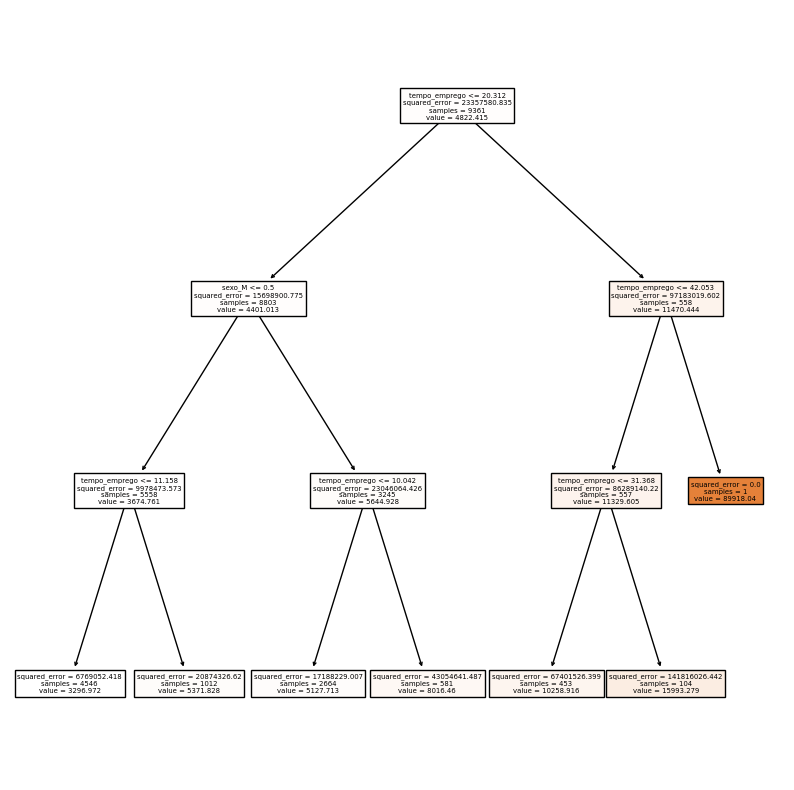

In [29]:
train1 = regr1.predict(X_train_c)

In [ ]:
data = tree.export_graphviz(regr1, out_file=None,
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png")
graph

#plt.rc('figure', figsize=(10, 10))
#arv = tree.plot_tree(regr1,
#                    feature_names=X_train_c.columns.tolist(),
#                    filled=True)

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [ ]:
plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(4, 3)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'sexo', data = X)
sns.barplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_veiculo', data = X)
sns.pointplot(ax = axes[0, 2],y = 'renda', x = 'posse_de_imovel', data = X)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'qtd_filhos', data = X)
tipo_renda = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'tipo_renda', data = X)
educação = sns.pointplot(ax = axes[1, 2],y = 'renda', x = 'educacao', data = X)
sns.pointplot(ax = axes[2, 0],y = 'renda', x = 'estado_civil', data = X)
tipo_residencia = sns.pointplot(ax = axes[2, 1],y = 'renda', x = 'tipo_residencia', data = X)
idade = sns.barplot(ax = axes[2, 2],y = 'renda', x = 'idade', data = X)
tempo_emprego = sns.pointplot(ax = axes[3, 0],y = 'renda', x = 'tempo_emprego', data = X)
sns.pointplot(ax = axes[3, 1],y = 'renda', x = 'qt_pessoas_residencia', data = X)
sns.pointplot(ax = axes[3, 2],y = 'renda', x = 'renda', data = X)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=45, horizontalalignment='right')
idade.set_xticklabels(idade.get_xticklabels(), rotation=45, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=45, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplots_adjust(wspace=0.4, hspace=0.9)

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.